In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import timeit

import tensorflow as tf
from tensorflow.keras import layers,models
keras = tf.keras
AUTOTUNE = tf.data.experimental.AUTOTUNE ## tf.data transformation parameters

matplotlib.style.use('ggplot')

In [2]:
import PIL
import PIL.Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [3]:
import pathlib
import cv2 as cv
import os

In [4]:
from sklearn.metrics import roc_curve, auc

# Dummy Model

In [ ]:
np.random.choice( ,p[])

# Create Dir path for each class

In [5]:
data_dir = pathlib.Path('images/')

In [6]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

7840


In [7]:
others = list(data_dir.glob('others/*'))
pedestrianCrossing = list(data_dir.glob('pedestrianCrossing/*'))
speedLimit = list(data_dir.glob('speedLimit/*'))
stop_sign = list(data_dir.glob('stop_sign/*'))
dct = {'others' :len(others),'pedestrianCrossing' :len(pedestrianCrossing),'speedLimit': len(speedLimit),'stop_sign': len(stop_sign)}
for k,v in dct.items():
    print(k,'  ',v,'samples -- ',round(100*v/7840,1),'%')

others    3397 samples --  43.3 %
pedestrianCrossing    947 samples --  12.1 %
speedLimit    1603 samples --  20.4 %
stop_sign    1897 samples --  24.2 %


In [533]:
PIL.Image.open?

Signature: PIL.Image.open(fp, mode='r')
Docstring:
Opens and identifies the given image file.

This is a lazy operation; this function identifies the file, but
the file remains open and the actual image data is not read from
the file until you try to process the data (or call the
:py:meth:`~PIL.Image.Image.load` method).  See
:py:func:`~PIL.Image.new`. See :ref:`file-handling`.

:param fp: A filename (string), pathlib.Path object or a file object.
   The file object must implement :py:meth:`~file.read`,
   :py:meth:`~file.seek`, and :py:meth:`~file.tell` methods,
   and be opened in binary mode.
:param mode: The mode.  If given, this argument must be "r".
:returns: An :py:class:`~PIL.Image.Image` object.
:exception FileNotFoundError: If the file cannot be found.
:exception PIL.UnidentifiedImageError: If the image cannot be opened and
   identified.
:exception ValueError: If the ``mode`` is not "r", or if a ``StringIO``
   instance is used for ``fp``.
File:      /opt/anaconda3/lib/pytho

In [8]:

PIL.Image.open(str(stop_sign[5]),)

In [454]:
# Distribution Plot

In [9]:
dist_img = np.array([3397,947,1603,1897])
len(dist_img)

4

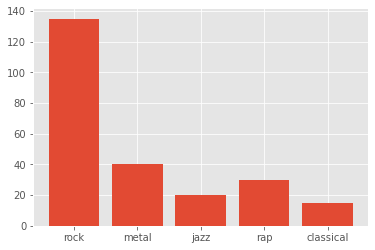

In [10]:
record_counts = pd.DataFrame(
    {'count': [135, 40, 20, 30, 15], 
     'genre': ['rock', 'metal', 'jazz', 'rap', 'classical']}
)
# x will be the left hand edge of the bars.
x = np.arange(len(record_counts['genre']))

fig, ax = plt.subplots()

bars = ax.bar(x, record_counts['count'])
# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x)
ax.set_xticklabels(record_counts['genre']);

Text(0.5, 1.0, 'Classes Distribution ')

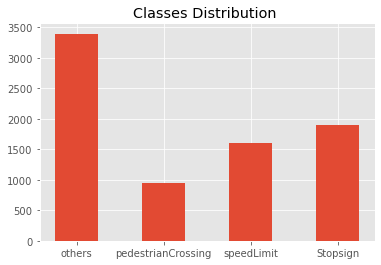

In [11]:
dist_img = pd.DataFrame(
    {'count': [3397, 947,1603, 1897], 
     'classes': ['others', 'pedestrianCrossing', 'speedLimit', 'Stopsign']}
)

x = np.arange(len(dist_img['classes']))

fig, ax = plt.subplots()

bars = ax.bar(x, dist_img['count'],width = .5,tick_label=[3397, 947,1603, 1897])


ax.set_xticks(x)
ax.set_xticklabels(dist_img['classes'])
ax.set_title('Classes Distribution ')

# for index, value in enumerate([3397, 947,1603, 1897]):
#     ax.text(value, index, str(value))


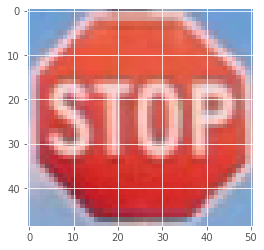

In [12]:
imagess = plt.imread(stop_sign[55])
plt.imshow(imagess)

In [464]:
ax.bar?

Signature:
ax.bar(
    x,
    height,
    width=0.8,
    bottom=None,
    *,
    align='center',
    data=None,
    **kwargs,
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *width* and *height*. The vertical baseline
is *bottom* (default 0).

Each of *x*, *height*, *width*, and *bottom* may either be a scalar
applying to all bars, or it may be a sequence of length N providing a
separate value for each bar.

Parameters
----------
x : sequence of scalars
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : scalar or sequence of scalars
    The height(s) of the bars.

width : scalar or array-like, optional
    The width(s) of the bars (default: 0.8).

bottom : scalar or array-like, optional
    The y coordinate(s) of the bars bases (default: 0).

align : {'center', 'edge'}, optional, default: 'center'
    Alignment of the bars to the *x* coordinates:

  

# Create Data for training 

#--Method 1 - using standard image dataset

In [13]:
batch_size = 32
img_height = 299
img_width = 299
channel_num = 3

In [14]:
tf.keras.preprocessing.image_dataset_from_directory?

Signature:
tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
)
Docstring:
Generates a `tf.data.Dataset` from image files in a directory.

If your directory structure is:

```
main_directory/
...class_a/
......a_image_1.jpg
......a_image_2.jpg
...class_b/
......b_image_1.jpg
......b_image_2.jpg
```

Then calling `image_dataset_from_directory(main_directory, labels='inferred')`
will return a `tf.data.Dataset` that yields batches of images from
the subdirectories `class_a` and `class_b`, together with labels
0 and 1 (0 corresponding to `class_a` and 1 corresponding to `class_b`).

Supported image formats: jpeg, png, bmp, gif.
Animated gifs are truncated to the first frame.

Arguments:
  directory: Directory wh

In [60]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  #labels ='inferred',
  subset="training",
  shuffle=True,
  seed=123,
  color_mode ='rgb',
  label_mode = "int",
  image_size=(img_height, img_width),
  batch_size = batch_size)

Found 7840 files belonging to 4 classes.
Using 6272 files for training.


In [16]:
train_ds.as_numpy_iterator()

In [61]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  #labels ='inferred',
  subset="validation",
  shuffle=True,
  seed=123,
  color_mode ='rgb',
  label_mode = "int",
  image_size=(img_height, img_width),
  batch_size = batch_size)

Found 7840 files belonging to 4 classes.
Using 1568 files for validation.


In [67]:
train_ds.take?

Signature: train_ds.take(count)
Docstring:
Creates a `Dataset` with at most `count` elements from this dataset.

>>> dataset = tf.data.Dataset.range(10)
>>> dataset = dataset.take(3)
>>> list(dataset.as_numpy_iterator())
[0, 1, 2]

Args:
  count: A `tf.int64` scalar `tf.Tensor`, representing the number of
    elements of this dataset that should be taken to form the new dataset.
    If `count` is -1, or if `count` is greater than the size of this
    dataset, the new dataset will contain all elements of this dataset.

Returns:
  Dataset: A `Dataset`.
File:      /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py
Type:      method


In [64]:

class_names = train_ds.class_names
np_class_names = np.array(class_names)
#sobel_ =tf.image.sobel_edges(train_ds)

X_train = []
y_train = []
for i,l in train_ds.take(2):
    X_train.append(i)
    y_train.append(l.numpy())
    #print(i.shape)
  

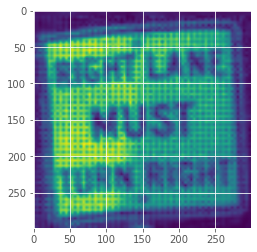

In [65]:
jj = X_train[0][31]
plt.imshow(jj[...,0])

(1, 32, 299, 299, 3)
(1, 32, 299, 299, 3)
(1, 32)


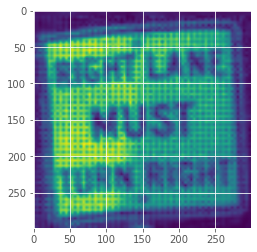

In [106]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train_scaled = X_train/255
print(X_train.shape)
print(X_train_scaled.shape)
print(y_train.shape)
plt.imshow(X_train[0][31][...,0])

In [23]:
fig,axs = plt.subplots(3,3,figsize=(10,10))
for i,each in enumerate(X_train):
    for j,ax in enumerate(axs.flatten()):
        ax.imshow(each[j,...,0].astype(np.uint8),cmap='rgb')
        ax.set_title(class_names[y_train[i][j]])
    fig.tight_layout()
    break

ValueError: 'rgb' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [24]:
fig,axs = plt.subplots(3,3,figsize=(10,10))
for i,each in enumerate(X_train_scaled):
    for j,ax in enumerate(axs.flatten()):
        ax.imshow(each[j,...])
        ax.set_title(class_names[y_train[i][j]])
    fig.tight_layout()
    break

TypeError: Invalid shape (256, 256, 1) for image data

In [26]:
fig,ax = plt.subplots(1,2)
for each in X_train:
    for e in X_train_scaled:
        print(each[31].shape)
        print(e[31].shape)
        ax[0].imshow(each[31].astype(np.uint8))
        ax[0].set_title('0')
        ax[1].imshow(e[31])
        ax[1].set_title('1')
    break

(256, 256, 1)
(256, 256, 1)


TypeError: Invalid shape (256, 256, 1) for image data

In [27]:
class_names

['others', 'pedestrianCrossing', 'speedLimit', 'stop_sign']

#-- Method 2: using augmentation

In [28]:
keras.preprocessing.image.ImageDataGenerator?

Init signature:
keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)
Docstring:     
Generate batches of tensor image data with real-time data augmentation.

 The data will be looped over (in batches).

Arguments:
    featurewise_center: Boolean.
        Set input mean to 0 over the dataset, feature-wise.
    samplewise_center: Boolean. Set each sample mean to 0.
    featurewise_std_normalization: Boolean.
        Divide inputs by st

In [29]:
def augment(x,y):
    image = tf.image.random_brightness(x,max_delta=0.05)
    return image,y
#train_ds = train_ds.map(augment)

In [30]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')

In [31]:
train_datagen= datagen.flow_from_directory(
    data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    color_mode = 'grayscale',
    class_mode='categorical'
)

Found 7840 images belonging to 4 classes.


In [32]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)


In [33]:
validation_datagen = test_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    color_mode = 'grayscale',
    batch_size=batch_size,
    class_mode='categorical')

Found 7840 images belonging to 4 classes.


In [55]:
class_names = train_ds.class_names

class_name_dict = {'others': 0,'pedestrianCrossing':1,'speedLimit':2,'stop_sign':3}
class_names

['others', 'pedestrianCrossing', 'speedLimit', 'stop_sign']

# Visualize data

In [106]:
tf.image.sobel_edges(train_ds)

AttributeError: 'BatchDataset' object has no attribute 'get_shape'

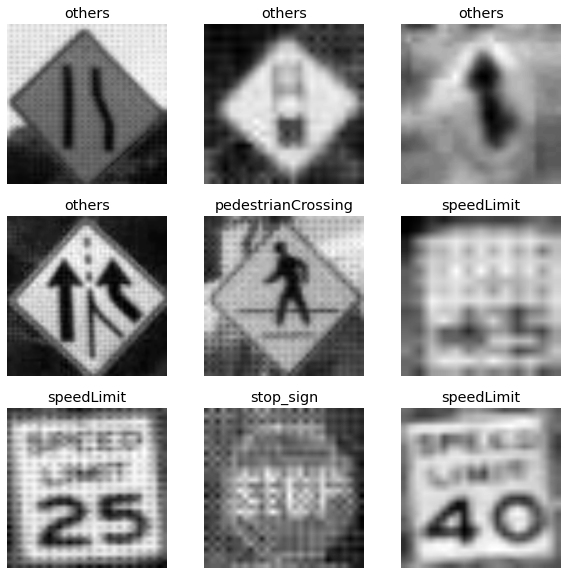

In [36]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i][...,0].numpy().astype('uint8'),cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [37]:
np_class_names = np.array(class_names)
for imgs,labels in train_ds.take(1):
    print(np_class_names[labels])
    

['pedestrianCrossing' 'speedLimit' 'stop_sign' 'others' 'stop_sign'
 'stop_sign' 'speedLimit' 'others' 'others' 'others' 'speedLimit'
 'speedLimit' 'others' 'pedestrianCrossing' 'pedestrianCrossing' 'others'
 'others' 'stop_sign' 'others' 'stop_sign' 'speedLimit' 'others' 'others'
 'others' 'others' 'speedLimit' 'stop_sign' 'stop_sign' 'stop_sign'
 'speedLimit' 'others' 'speedLimit']


In [38]:
train_ds.take(2)

<TakeDataset shapes: ((None, 256, 256, 1), (None,)), types: (tf.float32, tf.int32)>

# Build train data pipeline

In [278]:
7840/32

245.0

# Build model using Transfer Learning


In [129]:
base_model = keras.applications.Xception(include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(img_height,img_width,channel_num),
    pooling=None,
    classes=4,
    classifier_activation="softmax",)

In [130]:
keras.applications.Xception?

Signature:
keras.applications.Xception(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
)
Docstring:
Instantiates the Xception architecture.

Reference:
- [Xception: Deep Learning with Depthwise Separable Convolutions](
    https://arxiv.org/abs/1610.02357) (CVPR 2017)

Optionally loads weights pre-trained on ImageNet.
Note that the data format convention used by the model is
the one specified in your Keras config at `~/.keras/keras.json`.
Note that the default input image size for this model is 299x299.

Note: each Keras Application expects a specific kind of input preprocessing.
For Xception, call `tf.keras.applications.xception.preprocess_input` on your
inputs before passing them to the model.

Arguments:
  include_top: whether to include the fully-connected
    layer at the top of the network.
  weights: one of `None` (random initialization),
    'imagenet' (pre-train

In [131]:
base_model.summary()

                 
__________________________________________________________________________________________________
block5_sepconv1 (SeparableConv2 (None, 19, 19, 728)  536536      block5_sepconv1_act[0][0]        
__________________________________________________________________________________________________
block5_sepconv1_bn (BatchNormal (None, 19, 19, 728)  2912        block5_sepconv1[0][0]            
__________________________________________________________________________________________________
block5_sepconv2_act (Activation (None, 19, 19, 728)  0           block5_sepconv1_bn[0][0]         
__________________________________________________________________________________________________
block5_sepconv2 (SeparableConv2 (None, 19, 19, 728)  536536      block5_sepconv2_act[0][0]        
__________________________________________________________________________________________________
block5_sepconv2_bn (BatchNormal (None, 19, 19, 728)  2912        block5_sepconv2[0][0]     

In [132]:
def add_new_last_layer(base_model, nb_classes=4):
    """Add last layer to the convnet
    Args:
    base_model: keras model excluding top
    nb_classes: # of classes
    Returns:
    new keras model with last layer
    """
    # Get the output shape of the models last layer
    x = base_model.output
    # Convert final MxNxC tensor output into a 1xC tensor where C is the # of channels.
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(2048, activation='relu')(x) 
    x = keras.layers.Dropout(.5)(x)
    predictions = keras.layers.Dense(4, activation='softmax')(x)

    model = keras.models.Model(inputs=base_model.input, outputs=predictions)
    return model

In [133]:
# This will freeze the weights on all the layers except for our new dense layer
def setup_to_transfer_learn(model, base_model):
    """Freeze all layers and compile the model"""
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [134]:
train_model = add_new_last_layer(base_model)
setup_to_transfer_learn(train_model,base_model)

In [142]:
train_model.summary()

[0][0]        
__________________________________________________________________________________________________
block5_sepconv2_bn (BatchNormal (None, 19, 19, 728)  2912        block5_sepconv2[0][0]            
__________________________________________________________________________________________________
block5_sepconv3_act (Activation (None, 19, 19, 728)  0           block5_sepconv2_bn[0][0]         
__________________________________________________________________________________________________
block5_sepconv3 (SeparableConv2 (None, 19, 19, 728)  536536      block5_sepconv3_act[0][0]        
__________________________________________________________________________________________________
block5_sepconv3_bn (BatchNormal (None, 19, 19, 728)  2912        block5_sepconv3[0][0]            
__________________________________________________________________________________________________
add_111 (Add)                   (None, 19, 19, 728)  0           block5_sepconv3_bn[0][0]     

In [136]:
for i, layer in enumerate(train_model.layers):
    print(i, layer.name, layer.trainable)

0 input_10 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d_36 False
13 block2_pool False
14 batch_normalization_36 False
15 add_108 False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_37 False
23 block3_pool False
24 batch_normalization_37 False
25 add_109 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_38 False
33 block4_pool False
34 batch_normalization_38 False
35 add_110 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 bl

In [137]:
nb_epoch = 2

#image size 299-299-3
#batch = 32
train_model.fit(
    train_ds,
    epochs=nb_epoch,
    steps_per_epoch=6272 // batch_size,
    validation_data=val_ds,
    validation_steps=1568 // batch_size)



Epoch 1/2
196/196 [==============================] - 1304s 7s/step - loss: 18.2496 - accuracy: 0.5755 - val_loss: 0.6818 - val_accuracy: 0.8291
Epoch 2/2
196/196 [==============================] - 1290s 7s/step - loss: 0.8879 - accuracy: 0.7544 - val_loss: 0.5049 - val_accuracy: 0.8253


In [138]:
train_model.save('xception_2epochs.model')

INFO:tensorflow:Assets written to: xception_2epochs.model/assets


In [156]:
model = models.load_model('xception_7epochs.model')

In [18]:
nb_epoch = 1

model.fit(
    train_ds,
    epochs=nb_epoch,
    steps_per_epoch=6272 // batch_size,
    validation_data=val_ds,
    validation_steps=1568 // batch_size)

Epoch 1/2
196/196 [==============================] - 3927s 20s/step - loss: 0.4414 - accuracy: 0.8712 - val_loss: 2.1395 - val_accuracy: 0.6977
Epoch 2/2
196/196 [==============================] - 3965s 20s/step - loss: 0.2814 - accuracy: 0.9192 - val_loss: 1.1152 - val_accuracy: 0.8253


In [159]:
model.evaluate?

Signature:
model.evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
)
Docstring:
Returns the loss value & metrics values for the model in test mode.

Computation is done in batches (see the `batch_size` arg.)

Arguments:
    x: Input data. It could be:
      - A Numpy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
        (in case the model has multiple inputs).
      - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
      - A `tf.data` dataset. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
      - A generator or `keras.utils.Sequence` returning `(inputs, targets)`
        or `(inputs, targets, sample_weights)`

In [158]:
loss,accuracy =model.evaluate(val_ds)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


49/49 [==============================] - 263s 5s/step - loss: 0.1596 - accuracy: 0.9541
Loss: 0.1596049815416336
Accuracy: 0.954081654548645


['loss', 'accuracy']

model.save()

# Build model using tuner

In [386]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
def build_model(hp):
    model = keras.Sequential()
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, channel_num))
    model.add(layers.Conv2D(
        filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
        kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),
        activation='relu',
        input_shape=(img_width,img_height,channel_num))
        )

    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(
        filters=hp.Int('conv_2_filter',min_value=32,max_value=64,step=16),
        kernel_size=hp.Choice('conv_2_kernel',values =[3,5]),
        activation='relu')
        )

    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(
        units=hp.Int('dense_1_units',min_value=32,max_value=128,step=16),activation='relu')
        )

    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(4, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [387]:
tuner_search=RandomSearch(build_model,
objective='val_accuracy',
max_trials=5,
directory='output2_32_32_1',
project_name='traffic_sign')

In [388]:
tuner_search.search(train_ds,epochs=5,validation_data =val_ds)

Trial 5 Complete [00h 01m 04s]
val_accuracy: 0.9170918464660645

Best val_accuracy So Far: 0.9170918464660645
Total elapsed time: 00h 05m 07s
INFO:tensorflow:Oracle triggered exit


In [390]:
best_tunned_model2 = tuner_search.get_best_models(1)[0]

In [391]:
best_tunned_model2.save('best_tunned_model_withdropout_32_32_1.model')

INFO:tensorflow:Assets written to: best_tunned_model_withdropout_32_32_1.model/assets


In [392]:
best_tunned_model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 48)        76848     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 96)                115296    
_________________________________________________________________
dropout (Dropout)            (None, 96)                0

In [393]:
best_tunned_model2.fit(train_ds,epochs = 5,validation_data =val_ds,initial_epoch=3)

Epoch 4/5
196/196 [==============================] - 12s 60ms/step - loss: 0.3011 - accuracy: 0.9045 - val_loss: 0.3113 - val_accuracy: 0.8973
Epoch 5/5
196/196 [==============================] - 11s 58ms/step - loss: 0.2739 - accuracy: 0.9120 - val_loss: 0.2357 - val_accuracy: 0.9247


# Model with .fit method

In [511]:
model = models.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, channel_num)))

model.add(layers.Conv2D(32,(3,3),activation='relu',padding = "same"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(4,activation='softmax'))
opt = keras.optimizers.Nadam()
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#model.fit(train_ds,epochs=10,verbose=1,validation_data=val_ds)
history = model.fit(train_ds,epochs=10,verbose=1,validation_data=val_ds)

Epoch 1/10
196/196 [==============================] - 12s 61ms/step - loss: 0.7071 - accuracy: 0.7419 - val_loss: 0.3346 - val_accuracy: 0.9037
Epoch 2/10
196/196 [==============================] - 11s 56ms/step - loss: 0.3447 - accuracy: 0.8935 - val_loss: 0.2450 - val_accuracy: 0.9222
Epoch 3/10
196/196 [==============================] - 11s 56ms/step - loss: 0.2764 - accuracy: 0.9129 - val_loss: 0.2128 - val_accuracy: 0.9362
Epoch 4/10
196/196 [==============================] - 11s 58ms/step - loss: 0.2257 - accuracy: 0.9227 - val_loss: 0.1916 - val_accuracy: 0.9343
Epoch 5/10
196/196 [==============================] - 10s 50ms/step - loss: 0.1916 - accuracy: 0.9359 - val_loss: 0.1774 - val_accuracy: 0.9407
Epoch 6/10
196/196 [==============================] - 10s 50ms/step - loss: 0.1605 - accuracy: 0.9431 - val_loss: 0.1630 - val_accuracy: 0.9445
Epoch 7/10
196/196 [==============================] - 10s 49ms/step - loss: 0.1376 - accuracy: 0.9509 - val_loss: 0.1447 - val_accuracy:

In [502]:
loss,accuracy =model.evaluate(val_ds)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


49/49 [==============================] - 1s 24ms/step - loss: 0.1398 - accuracy: 0.9554
Loss: 0.139800563454628
Accuracy: 0.9553571343421936


In [516]:
history.history['accuracy']

[0.7418686151504517,
 0.8934949040412903,
 0.9129464030265808,
 0.9226722121238708,
 0.9359056353569031,
 0.9430803656578064,
 0.9508928656578064,
 0.9575892686843872,
 0.9628507494926453,
 0.9693877696990967]

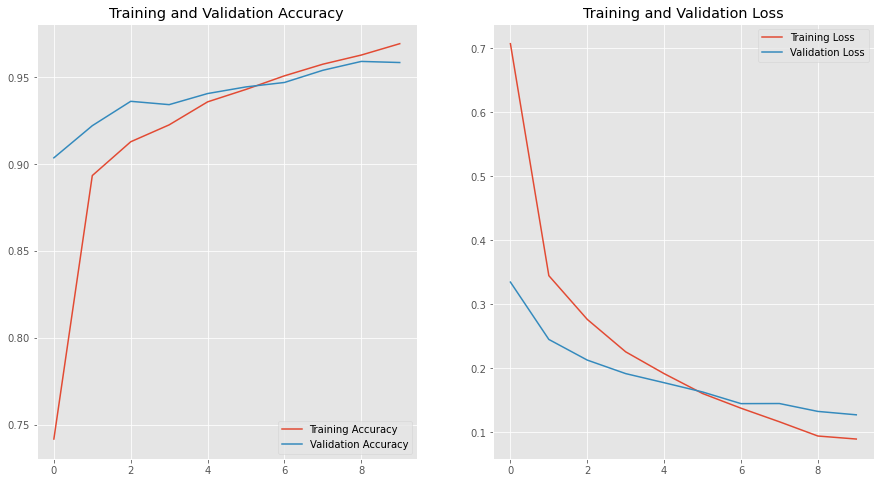

In [515]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model with Augmentation data

In [390]:
nb_train_samples = 640
nb_validation_samples = 640
epochs = 20



In [115]:
layers.Conv2D?

Init signature: layers.Conv2D(*args, **kwargs)
Docstring:     
2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved
with the layer input to produce a tensor of
outputs. If `use_bias` is True,
a bias vector is created and added to the outputs. Finally, if
`activation` is not `None`, it is applied to the outputs as well.

When using this layer as the first layer in a model,
provide the keyword argument `input_shape`
(tuple of integers, does not include the sample axis),
e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
in `data_format="channels_last"`.

Examples:

>>> # The inputs are 28x28 RGB images with `channels_last` and the batch
>>> # size is 4.
>>> input_shape = (4, 28, 28, 3)
>>> x = tf.random.normal(input_shape)
>>> y = tf.keras.layers.Conv2D(
... 2, 3, activation='relu', input_shape=input_shape[1:])(x)
>>> print(y.shape)
(4, 26, 26, 2)

>>> # With `dilation_rate` as 2.
>>> input_shape = (4, 28, 28, 3)
>

In [400]:
model_aug = models.Sequential()
model_aug.add(layers.Conv2D(16,(3,3),activation='relu',input_shape=(32,32,3)))
model_aug.add(layers.MaxPooling2D((2,2)))

model_aug.add(layers.Conv2D(32,(3,3),activation='relu'))
model_aug.add(layers.MaxPooling2D((2,2)))

model_aug.add(layers.Conv2D(64,(3,3),activation='relu'))
model_aug.add(layers.MaxPooling2D((2,2)))



model_aug.add(layers.Flatten())

model_aug.add(layers.Dense(64,activation='relu'))
model_aug.add(layers.Dense(4,activation='softmax'))
opt = keras.optimizers.Nadam()
model_aug.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model_aug.fit_generator(
    train_datagen,
    steps_per_epoch=len(train_datagen),
    epochs=epochs,
    validation_data = validation_datagen,
    validation_steps=len(validation_datagen)
)

Epoch 1/20
245/245 [==============================] - 60s 244ms/step - loss: 1.0712 - accuracy: 0.5593 - val_loss: 0.7191 - val_accuracy: 0.7625
Epoch 2/20
245/245 [==============================] - 59s 240ms/step - loss: 0.7575 - accuracy: 0.7219 - val_loss: 0.5659 - val_accuracy: 0.8097
Epoch 3/20
245/245 [==============================] - 59s 242ms/step - loss: 0.6131 - accuracy: 0.7846 - val_loss: 0.4532 - val_accuracy: 0.8620
Epoch 4/20
245/245 [==============================] - 57s 233ms/step - loss: 0.5114 - accuracy: 0.8188 - val_loss: 0.4200 - val_accuracy: 0.8564
Epoch 5/20
245/245 [==============================] - 65s 264ms/step - loss: 0.4728 - accuracy: 0.8360 - val_loss: 0.3449 - val_accuracy: 0.8820
Epoch 6/20
245/245 [==============================] - 62s 253ms/step - loss: 0.4104 - accuracy: 0.8556 - val_loss: 0.3288 - val_accuracy: 0.8964
Epoch 7/20
245/245 [==============================] - 60s 244ms/step - loss: 0.3871 - accuracy: 0.8695 - val_loss: 0.3576 - val_ac

In [401]:
loss_aug,accuracy_aug =model_aug.evaluate(validation_datagen)
print(f'Loss: {loss_aug}')
print(f'Accuracy: {accuracy_aug}')


245/245 [==============================] - 11s 43ms/step - loss: 0.1725 - accuracy: 0.9399
Loss: 0.17246226966381073
Accuracy: 0.9399234652519226


# Save the model so that we don't have to re-run again

In [48]:
model.save('Nadam_opt_3layers_64dense_128_128_1.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Nadam_opt_3layers_64dense_128_128_1.model/assets


In [402]:
model_aug.save('Nadam_opt_3layers_64dense_model_aug_grayscale.model')

INFO:tensorflow:Assets written to: Nadam_opt_3layers_64dense_model_aug_grayscale.model/assets


# we can call the model again

model = best_tunned_model2

model = models.load_model('Nadam_opt_model.model')

In [34]:
model = models.load_model('xception_7epochs.model')

In [35]:
model.summary()

act[0][0]        
__________________________________________________________________________________________________
block5_sepconv2_bn (BatchNormal (None, 19, 19, 728)  2912        block5_sepconv2[0][0]            
__________________________________________________________________________________________________
block5_sepconv3_act (Activation (None, 19, 19, 728)  0           block5_sepconv2_bn[0][0]         
__________________________________________________________________________________________________
block5_sepconv3 (SeparableConv2 (None, 19, 19, 728)  536536      block5_sepconv3_act[0][0]        
__________________________________________________________________________________________________
block5_sepconv3_bn (BatchNormal (None, 19, 19, 728)  2912        block5_sepconv3[0][0]            
__________________________________________________________________________________________________
add_111 (Add)                   (None, 19, 19, 728)  0           block5_sepconv3_bn[0][0]  

In [107]:
test_path = pathlib.Path.cwd().joinpath("test_images")
path_img = pathlib.Path.cwd().joinpath("test_images").joinpath('stopahead.png')
path_img1 = pathlib.Path.cwd().joinpath("images").joinpath('speedLimit').joinpath('325_speedLimit_1330545914.avi_image0.png')
test_path

PosixPath('/Users/tamquach/Desktop/Python files/DSI_resource/C3/test_images')

Found 80 files belonging to 4 classes.
(80, 299, 299, 3)


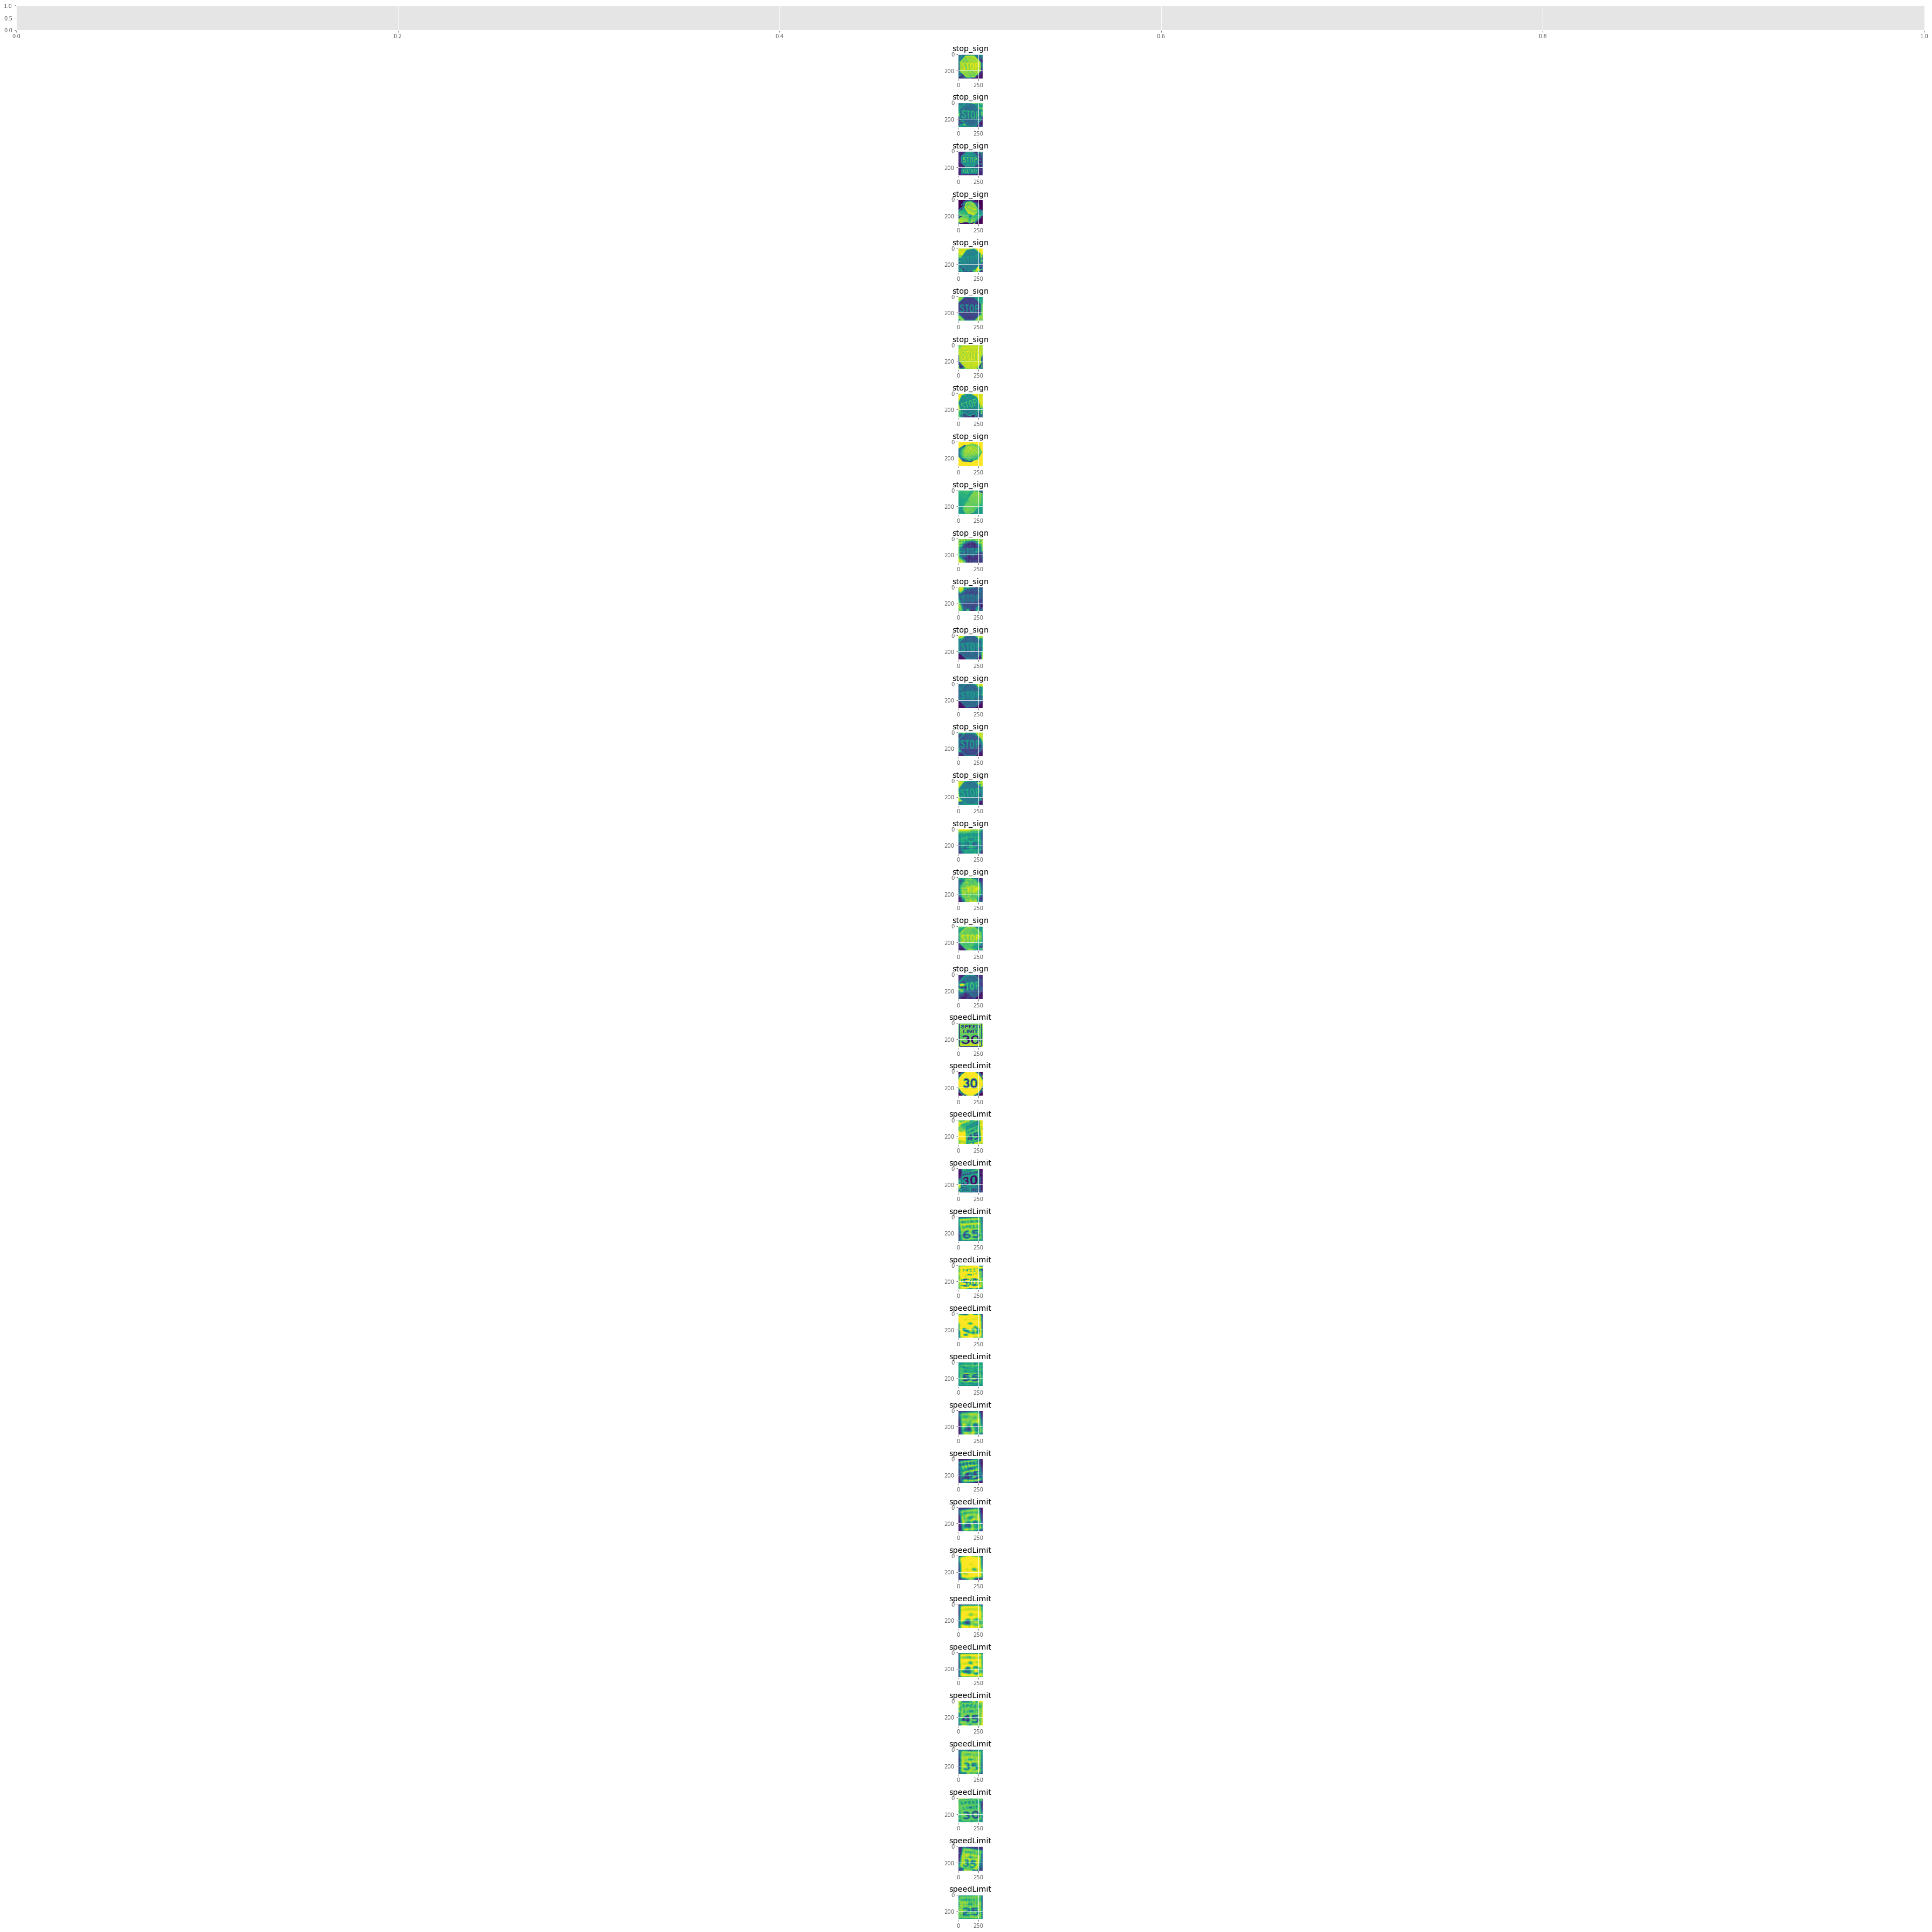

In [136]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  labels ='inferred',
  color_mode ='rgb',
  label_mode = "int",
  batch_size = 80,
  shuffle=False,
  image_size=(img_height, img_width))
X_test = []
y_test = []
sum = 0
for i,l in test_ds:
    sum += 1
    X_test.append(i)
    y_test.append(l)
    if sum ==2:
      print('im. hre/')
fig2,ax2 = plt.subplots(40,figsize=(50,50))

for images, labels in test_ds.take(1):
  print(images.shape)
  for i in range(80):
    if i > 40 and i <80:
      ax2[40-i].imshow(images[i][...,0].numpy().astype('uint8'))
      ax2[40-i].set_title(class_names[labels[i]])
  fig2.tight_layout()  

In [161]:
predict_lss = model.predict(val_ds)

In [206]:
predict_lss

array([[1.0000000e+00, 1.0236427e-10, 6.9177122e-09, 5.4073962e-10],
       [1.3006436e-02, 1.3187787e-04, 2.0859882e-03, 9.8477572e-01],
       [2.1095023e-02, 9.7802210e-01, 2.6877798e-04, 6.1423372e-04],
       ...,
       [9.9984157e-01, 7.9215124e-07, 1.2595118e-04, 3.1547155e-05],
       [9.2725028e-10, 1.0773918e-11, 9.2541530e-12, 1.0000000e+00],
       [1.4928488e-05, 2.8841680e-07, 3.5389974e-07, 9.9998438e-01]],
      dtype=float32)

#test_np = np.stack(list(test_dataset))
test_val = np.stack(list(y_val))

test_val

gg=[]
for each in test_val:
    for l in each:
        gg.append(l)
len(gg)

In [207]:
predicted_ls = []
prob_ls = []
prob_ls_class = []
real_ls = []
lst_imgs = []
lst_labels = []

#fig1,ax1 = plt.subplots(20,figsize=(50,50))
y_val = []
# for images, labels in val_ds.take(1):
#     lst_imgs = images
#     lst_labels = labels
for i,l in val_ds:
    y_val.append(l)

test_val = np.stack(list(y_val))

for i in test_val:
    for j in i:
        real_ls.append(j)



for i,each in enumerate(predict_lss): 
    index=np.argmax(each)    
    predicted_ls.append(index)
    prob_ls_class.append(each)
    prob_ls.append(np.max(each))





In [216]:
np.array(real_ls).reshape(1,-1)

array([[0, 0, 3, ..., 0, 0, 0]], dtype=int32)

In [217]:
np.array(predicted_ls).reshape(1,-1)

array([[0, 3, 1, ..., 0, 3, 3]])

In [54]:
y_test = np.array(y_test)
y_test.shape

(1, 80)

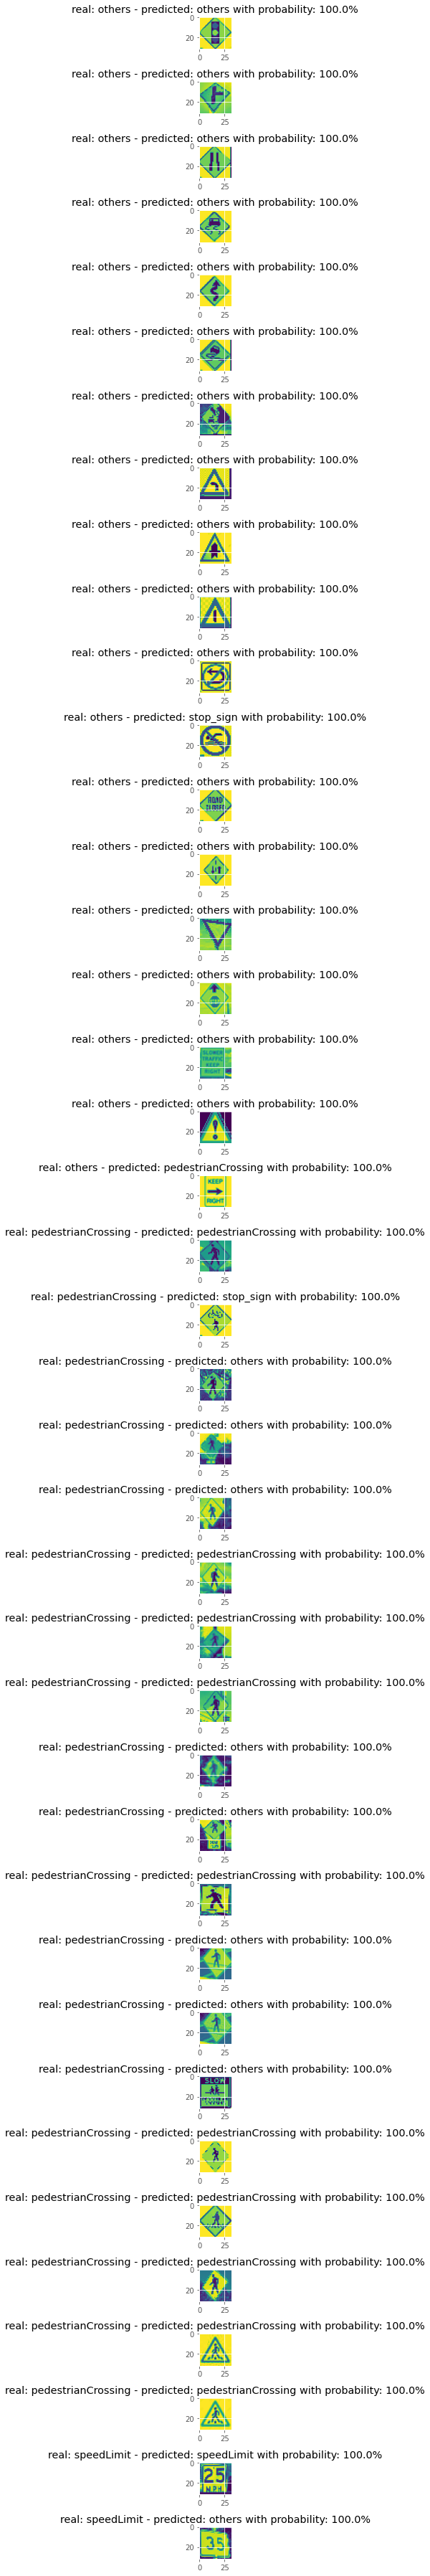

In [412]:
predicted_ls = []
prob_ls = []
prob_ls_class = []
real_ls = []
fig1,ax1 = plt.subplots(40,figsize=(50,50))
for i,each in enumerate(X_test[0]): 
    prediction = model.predict(np.array([each]))
    index=np.argmax(prediction)
    #print(prediction.flatten())
    predicted_ls.append(index)
    prob_ls_class.append(prediction)
    prob_ls.append(np.max(prediction))
    real_ls.append(y_test[0][i])
    if i < 40:
        ax1[i].imshow(each[...,0])
        ax1[i].set_title(f'real: {class_names[y_test[0][i]]} - predicted: {class_names[index]} with probability: {round(prob*100,2)}%')
fig1.tight_layout()

In [188]:
prob_ls

[1.0,
 0.9847757,
 0.9780221,
 0.9998598,
 1.0,
 0.9999993,
 0.99999976,
 0.98976517,
 0.99968064,
 0.9999701,
 1.0,
 0.999585,
 0.85195875,
 0.984121,
 1.0,
 0.99844176,
 1.0,
 0.9999931,
 0.6559727,
 0.6577523,
 0.983511,
 0.99990964,
 0.9812035,
 0.9994753,
 0.9999918,
 0.99941254,
 0.99999976,
 0.9999993,
 0.9896634,
 0.9753135,
 0.999368,
 1.0,
 0.99914074,
 0.98986346,
 0.9999733,
 0.9996556,
 0.99939406,
 1.0,
 1.0,
 0.99994826,
 0.9998042,
 0.98507893,
 0.3782412,
 0.98920316,
 0.99878067,
 1.0,
 0.993009,
 0.99996746,
 0.9999995,
 0.99902153,
 0.9962451,
 0.9999907,
 0.6007129,
 0.80229324,
 1.0,
 0.99963593,
 0.8136225,
 0.4890504,
 0.9999901,
 1.0,
 0.999998,
 0.999962,
 0.9760633,
 1.0,
 0.9999126,
 0.99845886,
 0.99922097,
 0.99984634,
 0.99994373,
 0.9989165,
 0.99993396,
 0.9993536,
 0.9999949,
 0.66118085,
 0.9999901,
 0.99974257,
 0.9374955,
 0.9988972,
 0.75074774,
 1.0,
 0.95237416,
 0.999828,
 1.0,
 0.2917066,
 1.0,
 0.93359613,
 0.99999547,
 0.9999999,
 0.99999976,


test_img = []
for ext in ('*.png','*.jpg','*.jpeg'):
    test_img.extend(list(test_path.glob(ext)))

fig,ax = plt.subplots(len(test_img),figsize=(50,50))
predicted_ls = []
prob_ls = []
for i,each in enumerate(test_img):   
    test_ds = tf.keras.preprocessing.image.load_img(
    each,
    color_mode='grayscale',
    target_size=(128,128),
    interpolation='bilinear',)
    input_arr = keras.preprocessing.image.img_to_array(test_ds)
    input_arr = np.array([input_arr])
    print(input_arr.shape)

    prediction = model.predict(input_arr)
    #prediction = model_aug.predict(input_arr)
    
    index=np.argmax(prediction)
    prob = np.max(prediction)
    predicted_ls.append(index)
    prob_ls.append(prob)
    input_arr1 = input_arr[0,...]
    ax[i].imshow(input_arr1[...,0],cmap='gray')
    ax[i].set_title(f'{class_names[index]} with {round(prob*100,2)}%')
fig.tight_layout()



In [139]:
np.array(prob_ls)[...,0]

array(1., dtype=float32)

In [219]:

predicted_ls = np.array(predicted_ls)
real_ls = np.array(real_ls)

In [222]:
predicted_ls.shape

(1568,)

In [223]:
#print((real_ls==0).astype(int))
print(real_ls)
real_ls_others =(real_ls==0).astype(int) 
real_ls_pedestrianCrossing =(real_ls==1).astype(int) 
real_ls_speedLimit =(real_ls==2).astype(int) 
real_ls_stopsign =(real_ls==3).astype(int) 

[0 0 3 ... 0 0 0]


In [224]:
print(predicted_ls)

[0 3 1 ... 0 3 3]


In [225]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve((real_ls==i).astype(int), np.array(prob_ls_class)[...,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

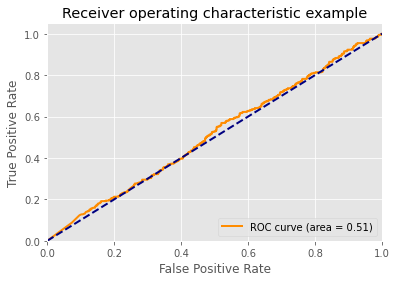

In [226]:
plt.figure()
lw = 2
plt.plot(fpr[3], tpr[3], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[3])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [194]:
roc_auc[3]

0.494086239825789

In [195]:
m = tf.keras.metrics.AUC(num_thresholds=3)
m.update_state(real_ls,np.array(prob_ls))
m.result().numpy()



0.5010387

In [196]:
real_ls

array([0, 0, 2, ..., 3, 0, 0], dtype=int32)

In [197]:
predicted_ls

array([0, 3, 1, ..., 0, 3, 3])

In [198]:
p=np.array(class_names)[predicted_ls]
r=np.array(class_names)[real_ls]

In [199]:
cf_matrix = tf.math.confusion_matrix(real_ls,predicted_ls)
cf_matrix = cf_matrix.numpy()
print(cf_matrix.sum())
cf_matrix_crosstab = pd.crosstab(r, p, rownames=['actual'], colnames=['predicted'])
cf_matrix_crosstab

1568


predicted,others,pedestrianCrossing,speedLimit,stop_sign
actual,,,,
others,300,71,146,177
pedestrianCrossing,84,31,41,44
speedLimit,127,43,67,61
stop_sign,151,50,87,88


In [200]:
test_accuracy = np.trace(cf_matrix)/cf_matrix.sum()
test_accuracy

0.30994897959183676

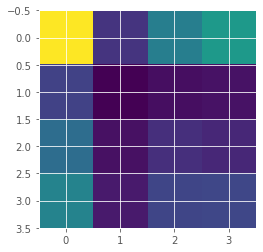

In [203]:
plt.imshow(cf_matrix)

In [204]:
import  itertools
def plot_confusion_matrix(cm, ax, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    p = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title,fontsize=24)
    
    plt.colorbar(p)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=0,fontsize=14)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes,fontsize=14)
   
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 1.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center", size = 24,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    ax.set_ylabel('True label',fontsize=24)
    ax.set_xlabel('Predicted label',fontsize=24)

Confusion matrix, without normalization
[[300  71 146 177]
 [ 84  31  41  44]
 [127  43  67  61]
 [151  50  87  88]]


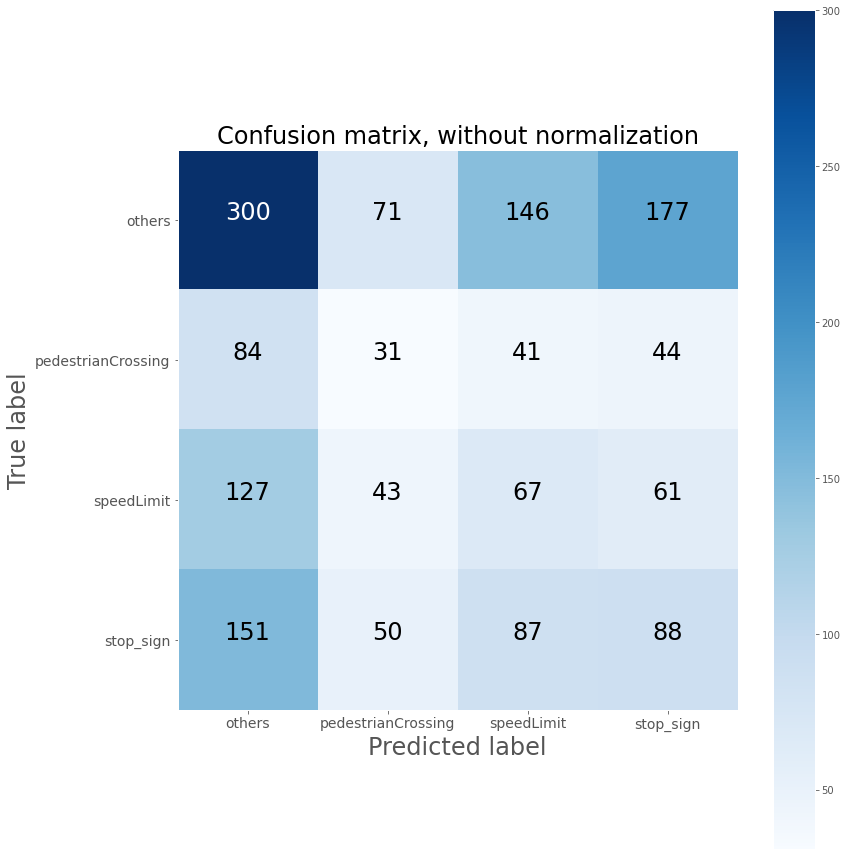

In [205]:

	fig = plt.figure(figsize=(12,12))
	ax = fig.add_subplot(111)
	ax.grid(False)
	# class_names = ['fish', 'not fish']
	plot_confusion_matrix(cf_matrix, ax, classes=class_names,normalize=False,
                      title='Confusion matrix, without normalization')
	plt.show()

In [ ]:
for i,l in val_ds:
    k=i[19,...]
    k_label = l[19,...]
    break
print(class_names[k_label])
k = np.array([k])
k.shape

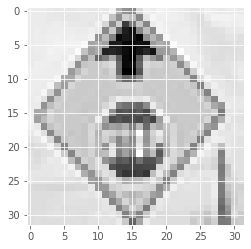

In [190]:
test_ds = tf.keras.preprocessing.image.load_img(
    path_img,
    color_mode='grayscale',
    interpolation='bilinear',
)
input_arr = keras.preprocessing.image.img_to_array(test_ds)
input_arr = np.array([input_arr]) 
input_arr1 = input_arr[0,...]
plt.imshow(input_arr1[...,0],cmap='gray')

In [178]:
tf.keras.preprocessing.image.load_img?

Signature:
tf.keras.preprocessing.image.load_img(
    path,
    grayscale=False,
    color_mode='rgb',
    target_size=None,
    interpolation='nearest',
)
Docstring:
Loads an image into PIL format.

Usage:

```
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
```

Arguments:
    path: Path to image file.
    grayscale: DEPRECATED use `color_mode="grayscale"`.
    color_mode: One of "grayscale", "rgb", "rgba". Default: "rgb".
        The desired image format.
    target_size: Either `None` (default to original size)
        or tuple of ints `(img_height, img_width)`.
    interpolation: Interpolation method used to resample the image if the
        target size is different from that of the loaded image.
        Supported methods are "nearest", "bilinear", and "bicubic".
        If PIL version 1.1.3 or newer is ins

In [191]:
class_names =['others', 'pedestrianCrossing', 'speedLimit', 'stop_sign']
#prediction = model.predict(k)
prediction = model.predict(input_arr)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

Prediction is others
